# Unit 5 - Financial Planning


In [10]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [11]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [12]:
# Set current amount of crypto assets
my_btc=1.2
my_eth=5.3

In [13]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"
btc_data = requests.get(btc_url).json()
eth_data = requests.get(eth_url).json()


#print(json.dumps(btc_data, indent=4))

#print(json.dumps(eth_data, indent=4))


In [14]:
# Fetch current BTC price
btc_price = (btc_data['data']['1']['quotes']['USD']['price'])
#print((btc_data['data']['1']['name']) + " USD " + str(btc_price))

# Fetch current ETH price
eth_price = eth_data['data']['1027']['quotes']['USD']['price']
#print((eth_data['data']['1027']['name'])+ " USD " + str(eth_price))

# Compute current value of my crpto
my_btc_value=btc_price*my_btc
my_eth_value=eth_price*my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $13660.68
The current value of your 5.3 ETH is $1955.17


In [15]:

crypto_data = {
    "crypto": [my_btc, my_eth],
    "price": [btc_price, eth_price],
    "value": [my_btc*btc_price, my_eth*eth_price]
}

# Set the tickers
crypto_tickers = ["BTC", "ETH"]

# Create the crypto DataFrame
df_crypto = pd.DataFrame(crypto_data, index=crypto_tickers)

# Display crypto data
df_crypto

,crypto,price,value
BTC,1.2,11383.9,13660.68
ETH,5.3,368.9,1955.17


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [16]:
# Current amount of shares
my_agg=200
my_spy=50
shares_data = {
    "shares": [my_agg, my_spy]
}

# Set the tickers
#tickers = ["AGG", "SPY"]

# Create the shares DataFrame
#df_shares = pd.DataFrame(shares_data, index=tickers)

# Display shares data
#df_shares

In [17]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

#print(f"Alpaca Key type: {type(alpaca_api_key)}")
#print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

# Create the Alpaca API object

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [18]:
# Format current date as ISO format
today = pd.Timestamp("2020-10-16", tz="America/New_York").isoformat()


# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
df_portfolio

AGG                                        SPY  \
                             open      high     low   close   volume    open   
2020-10-16 00:00:00-04:00  117.99  118.0778  117.88  117.88  3589312  348.96   

                                                            
                             high    low   close    volume  
2020-10-16 00:00:00-04:00  350.75  347.1  347.25  62467863

In [19]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.88
Current SPY closing price: $347.25


In [20]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy


# Print current value of share
print(f"The current value of your {my_spy} SPY shares is $ {my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is $ {my_agg_value:0.2f}")

The current value of your 50 SPY shares is $ 17362.50
The current value of your 200 AGG shares is $ 23576.00


In [21]:
# SHARES DATAFRAME with price
my_agg=200
my_spy=50
shares_data = {
    "shares": [my_agg, my_spy],
    "price": [agg_close_price, spy_close_price],
    "value": [my_agg*agg_close_price, my_spy*spy_close_price]
}

# Set the tickers
tickers = ["AGG", "SPY"]

# Create the shares DataFrame
df_shares = pd.DataFrame(shares_data, index=tickers)

# Display shares data
df_shares

,shares,price,value
AGG,200,117.88,23576.0
SPY,50,347.25,17362.5


## MERGING TWO DATAFRAMES (self-driven activity)

In [22]:
# Let's build the skeleton of the dataframe that we finally need
df_investment = pd.DataFrame(columns=['CATEGORY', 'TICKER', 'PRICE', 'UNITS', 'AMOUNT'])

# [ PROCESS df_crypto DATAFRAME ]
# Let's parse the first dataframe i.e df_crypto row-by-row and fill up df_investment
# Get column name
crypto_cols = df_crypto.columns
vCategory = crypto_cols.tolist()[0]
for index, row in df_crypto.iterrows():
    category = vCategory
    ticker = index
    price = row['price']
    units = row['crypto']
    mktValue = row['value']
    #print(category, ticker, price, units, mktValue)
    df_investment = df_investment.append({
                                            'CATEGORY':category,
                                            'TICKER':ticker,
                                            'PRICE':price,
                                            'UNITS':units,
                                            'AMOUNT':mktValue
                                         }, ignore_index=True)

# [ PROCESS df_shares DATAFRAME ]
# Let's parse the second dataframe i.e df_shares row-by-row and fill up df_investment
# Get column name
shares_cols = df_shares.columns
vCategory = shares_cols.tolist()[0]
for index, row in df_shares.iterrows():
    category = vCategory
    ticker = index
    price = row['price']
    units = row['shares']
    mktValue = row['value']
    #print(category, ticker, price, units, mktValue)
    df_investment = df_investment.append({
                                            'CATEGORY':category,
                                            'TICKER':ticker,
                                            'PRICE':price,
                                            'UNITS':units,
                                            'AMOUNT':mktValue
                                         }, ignore_index=True)
    
# Print Results
df_investment.reset_index(drop=True)
df_investment

,CATEGORY,TICKER,PRICE,UNITS,AMOUNT
0,crypto,BTC,11383.90,1.2,13660.68
1,crypto,ETH,368.90,5.3,1955.17
2,shares,AGG,117.88,200.0,23576.00
3,shares,SPY,347.25,50.0,17362.50


## Savings Health Analysis

In [23]:
# Set monthly household income
monthly_income=12000

In [24]:
# Plot savings pie chart
df_savings= df_investment.groupby('CATEGORY').sum()
df_savings = df_savings.drop(columns=['PRICE', 'UNITS'])
df_savings

,AMOUNT
CATEGORY,
crypto,15615.85
shares,40938.50


In [25]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_saving = df_savings['AMOUNT'].sum()
#print("TOTAL SAVING IS $"+str (total_saving))
      

# Validate saving health
if total_saving > emergency_fund:
    print("congratulations! You have enough money in this fund")
elif total_saving == emergency_fund:
     print("congratulations! you have reached the financial goal")
else:
    print(f"You are only $ {emergency_fund-total_saving:0.2f} from reaching your goal")

congratulations! You have enough money in this fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [17]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-10-16', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-10-16', tz='America/New_York').isoformat()

In [18]:
# Get 5 years' worth of historical data for SPY and AGG
tickers = ["SPY","AGG"]

df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Display sample data
df_stock_data.head()

AGG                                         SPY  \
                             open     high     low   close     volume    open   
2015-10-16 00:00:00-04:00  109.90  109.940  109.78  109.78  1497588.0  202.83   
2015-10-19 00:00:00-04:00  109.78  109.895  109.65  109.85  1289942.0  202.50   
2015-10-20 00:00:00-04:00  109.64  109.780  109.55  109.65  1672562.0  202.85   
2015-10-21 00:00:00-04:00  109.73  109.950  109.73  109.89  1119723.0  203.61   
2015-10-22 00:00:00-04:00  109.90  110.050  109.83  109.94  1817244.0  202.98   

                                                                
                             high       low   close     volume  
2015-10-16 00:00:00-04:00  203.29  201.9200  203.14   79323870  
2015-10-19 00:00:00-04:00  203.37  202.1300  203.33   61255929  
2015-10-20 00:00:00-04:00  203.84  202.5471  203.07   60081395  
2015-10-21 00:00:00-04:00  203.79  201.6500  201.82   83704739  
2015-10-22 00:00:00-04:00  205.51  202.8100  205.22  121670959

In [19]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.6,.4],
    num_simulation = 500,
    num_trading_days = 252*30
)


In [20]:
# Printing the simulation input data
MC_even_dist.portfolio_data.head()

AGG                                      \
                             open     high     low   close     volume   
2015-10-16 00:00:00-04:00  109.90  109.940  109.78  109.78  1497588.0   
2015-10-19 00:00:00-04:00  109.78  109.895  109.65  109.85  1289942.0   
2015-10-20 00:00:00-04:00  109.64  109.780  109.55  109.65  1672562.0   
2015-10-21 00:00:00-04:00  109.73  109.950  109.73  109.89  1119723.0   
2015-10-22 00:00:00-04:00  109.90  110.050  109.83  109.94  1817244.0   

                                           SPY                            \
                          daily_return    open    high       low   close   
2015-10-16 00:00:00-04:00          NaN  202.83  203.29  201.9200  203.14   
2015-10-19 00:00:00-04:00     0.000638  202.50  203.37  202.1300  203.33   
2015-10-20 00:00:00-04:00    -0.001821  202.85  203.84  202.5471  203.07   
2015-10-21 00:00:00-04:00     0.002189  203.61  203.79  201.6500  201.82   
2015-10-22 00:00:00-04:00     0.000455  202.98  205.51  202.8100  205.22   

                                                   
                              volume daily_return  
2015-10-16 00:00:00-04:00   79323870          NaN  
2015-10-19 00:00:00-04:00   61255929     0.000935  
2015-10-20 00:00:00-04:00   60081395    -0.001279  
2015-10-21 00:00:00-04:00   83704739    -0.006156  
2015-10-22 00:00:00-04:00  121670959     0.016847

In [21]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003071,0.992046,0.993448,0.993225,1.007070,0.997505,0.998751,1.005016,0.997638,1.002167,...,1.000249,1.008015,0.992393,1.001358,0.999799,1.014350,1.003225,0.995755,1.012528,1.010477
2,1.006907,0.994180,0.997815,0.989132,1.008283,0.994137,0.988220,1.018319,0.995437,1.019576,...,1.007037,1.009699,0.985640,1.005876,1.001318,1.010635,1.002667,0.998571,1.012052,1.017638
3,1.009720,0.998078,1.005157,0.986386,1.010324,1.006961,0.979301,1.012657,0.988365,1.026095,...,1.013129,1.021819,0.988392,1.007073,0.999642,1.011094,1.011934,1.005184,1.009650,1.025879
4,1.013411,0.994803,0.999217,0.980209,1.008023,1.015065,0.979854,1.010199,0.988409,1.014777,...,1.003742,1.021437,0.990828,1.014736,0.996780,1.007970,1.019897,1.005828,1.015743,1.021043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,4.638126,5.186736,6.158871,3.278620,3.102134,2.109900,9.332657,5.229226,10.032884,3.354184,...,4.884898,4.052370,6.046448,3.259737,5.474399,5.572100,10.568024,9.878062,5.175751,2.569413
7557,4.657436,5.196828,6.116662,3.298940,3.140616,2.113627,9.354888,5.275810,10.146821,3.344109,...,4.916701,4.044987,6.038131,3.268929,5.511506,5.561566,10.504994,9.822303,5.133379,2.596715
7558,4.654389,5.178057,6.196250,3.284661,3.179911,2.126044,9.371921,5.278386,10.130362,3.384249,...,4.908069,4.007466,6.021213,3.278318,5.510323,5.607824,10.496170,9.864923,5.109806,2.597052
7559,4.601656,5.196041,6.242060,3.283229,3.186342,2.137944,9.415681,5.331087,10.097491,3.382125,...,4.885305,4.031392,5.972944,3.277637,5.477549,5.577807,10.577994,9.858149,5.142422,2.599292


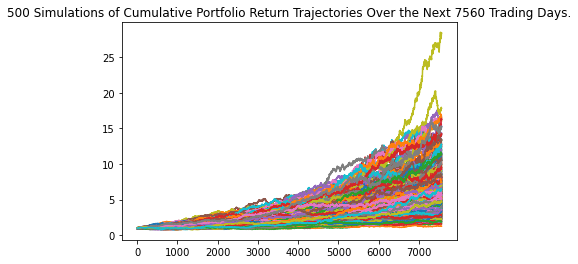

In [31]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

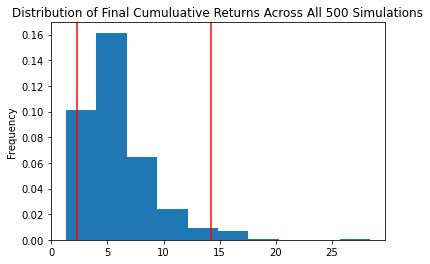

In [32]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()

### Retirement Analysis

In [33]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           500.000000
mean              5.986287
std               3.045316
min               1.287564
25%               3.887136
50%               5.321193
75%               7.085743
max              28.412386
95% CI Lower      2.274259
95% CI Upper     14.203775
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [34]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(even_tbl[8]*initial_investment,2)
ci_upper = round(even_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $45485.19 and $284075.5


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [35]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(even_tbl[8]*initial_investment,2)
ci_upper = round(even_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $68227.78 and $426113.25


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_even_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.6,.4],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [29]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996654,0.997961,1.005711,1.001898,1.006063,0.999107,1.004062,0.990757,1.002602,1.002049,...,0.999100,1.001912,0.996662,0.999781,1.000185,0.998997,1.002650,1.006031,0.996876,0.992168
2,0.998198,1.008858,1.001495,1.003031,1.011198,1.001411,1.009200,1.000707,1.002435,1.005299,...,0.993919,1.003845,0.998649,1.004338,0.997131,1.005314,1.010677,1.005644,0.993075,0.993667
3,1.001205,1.007761,0.999764,1.002664,1.016761,0.996536,0.997473,1.001504,1.011467,1.005161,...,0.995394,1.005751,0.997296,1.004576,0.992872,1.005607,1.014285,1.012709,0.996385,0.991652
4,1.005683,0.996172,0.994059,1.000642,1.022169,0.996037,1.001728,0.998697,1.010710,1.003937,...,0.994687,1.014417,0.994633,1.005834,0.994490,1.005259,1.018063,1.005745,0.992740,0.991654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,2.504786,5.351752,2.453002,5.336531,6.195698,12.512748,4.936858,4.715813,1.910807,6.004327,...,3.822991,6.761711,6.389390,7.289220,8.973645,8.393844,5.504728,4.651979,7.051738,2.344668
7557,2.503320,5.326434,2.444827,5.347256,6.196686,12.593574,4.938830,4.712334,1.914617,6.034531,...,3.829501,6.779618,6.375810,7.361684,8.927540,8.437877,5.517598,4.628686,7.064020,2.347809
7558,2.499769,5.327957,2.459977,5.368429,6.242244,12.576420,4.972090,4.697177,1.917844,6.006444,...,3.815597,6.783866,6.361489,7.351854,8.889407,8.468633,5.486150,4.613254,7.061444,2.347802
7559,2.517579,5.260541,2.466568,5.433410,6.269036,12.573464,5.001534,4.693958,1.911604,6.030490,...,3.830398,6.785277,6.335335,7.354525,8.932488,8.454701,5.464463,4.573907,7.090683,2.351079


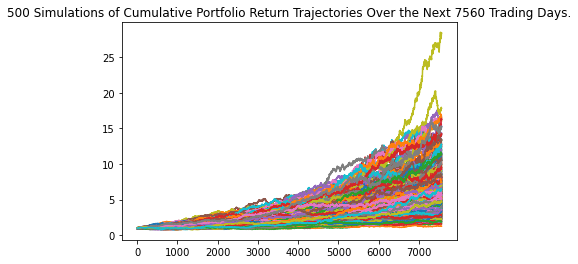

In [36]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

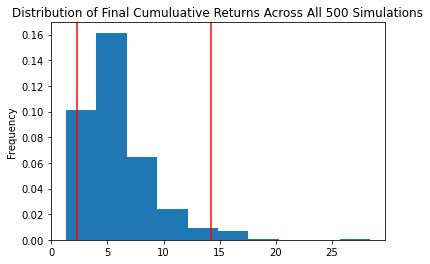

In [37]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()

In [38]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           500.000000
mean              5.986287
std               3.045316
min               1.287564
25%               3.887136
50%               5.321193
75%               7.085743
max              28.412386
95% CI Lower      2.274259
95% CI Upper     14.203775
Name: 7560, dtype: float64


In [40]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(even_tbl[8]*initial_investment,2)
ci_upper_five = round(even_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $136455.56 and $852226.49


### Ten Years Retirement Option

In [41]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_even_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.6,.4],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [30]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.987574,0.999063,0.993792,1.003305,1.004245,0.995132,1.000749,0.995592,1.002823,1.001443,...,1.000724,0.994296,0.994671,1.003072,0.993867,0.997807,1.003343,1.003712,0.995776,0.997751
2,0.988173,0.999831,0.995796,1.003194,0.999633,0.992375,1.001599,0.994286,1.002342,0.996355,...,0.996498,0.992834,0.993218,1.005104,0.996482,0.996588,1.003648,1.001768,0.997990,0.998652
3,0.980444,1.003962,0.996193,1.011885,1.002062,0.986069,0.999222,0.993373,1.005316,0.996052,...,0.990307,0.986660,0.992694,1.005990,1.005290,0.996436,1.000794,0.996323,1.000480,0.997295
4,0.971533,1.006040,0.998107,1.019907,1.000562,0.990929,0.996914,0.997618,1.005650,0.995322,...,0.983183,0.991430,0.994711,1.015830,1.001891,0.998914,1.007434,0.995578,1.009129,0.997803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,6.027023,7.365541,9.808009,5.006742,5.863188,7.153124,4.803348,3.642296,5.210393,2.978845,...,3.244208,7.373125,1.948181,2.851792,6.718808,8.225525,6.003070,15.078399,4.781982,6.511755
7557,6.013006,7.312283,9.841768,4.992318,5.796244,7.213803,4.784867,3.643831,5.216959,2.981246,...,3.238236,7.408990,1.938305,2.835031,6.724551,8.261443,5.980419,15.068296,4.753862,6.469943
7558,5.934708,7.285095,9.856296,4.993831,5.789862,7.167127,4.807253,3.624921,5.223234,2.967756,...,3.225113,7.443414,1.937924,2.839914,6.713192,8.224379,5.989381,15.121858,4.715902,6.456400
7559,6.000174,7.271840,9.857638,4.946441,5.803049,7.179700,4.811738,3.611052,5.238844,2.969059,...,3.214479,7.514872,1.933652,2.804824,6.723525,8.228085,5.995581,15.105912,4.698715,6.453486


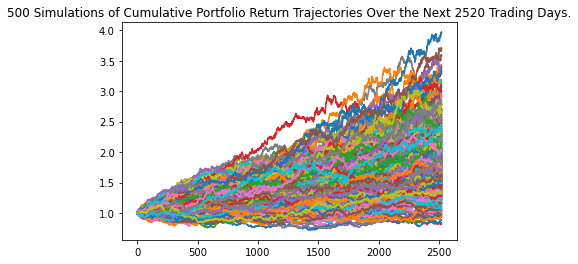

In [46]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

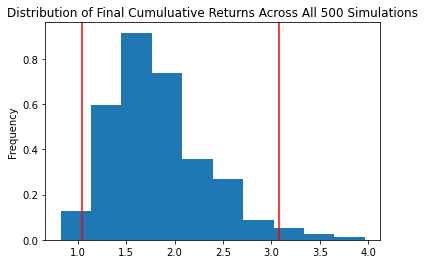

In [47]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()

In [48]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           500.000000
mean              1.835675
std               0.508788
min               0.822702
25%               1.470585
50%               1.741951
75%               2.084856
max               3.965034
95% CI Lower      1.047500
95% CI Upper      3.079313
Name: 2520, dtype: float64


In [49]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(even_tbl[8]*initial_investment,2)
ci_upper_ten = round(even_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $62850.02 and $184758.75
